<h1><center><bold>Time Series Forecasting Superstore Database </bold></center></h1>

This is a dataset from 'fivethirtyeight' - about a superstore which sells office supplies to both consumers, corporate and home offices.

The dataset is from 2014 to 2017.  I have processed it and tried to project their sales into 2017 - to improve my learning in time series analysis.

# **Table of Contents**
1. [Setup & Importing Dataset](#Section1)<br>
2. [EDA & Pre-processing](#Section2)<br>
3. [Time Series Analysis](#Section3)<br>
4. [Itertools to generate p,d & q](#Section4)<br>
5. [Predicting Results](#Section5)<br>

<a id = Section1></a>
### **1. Set-up & importing Dataset**

In [47]:
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

df = pd.read_excel('superstore.xls')

print('Loading Done')

Loading Done


In [48]:
df.shape

(9994, 21)

In [49]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<a id = Section2></a>
### **2. EDA and Pre-processing**

In [ ]:
df.info()

In [51]:
df.describe(include = 'all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,2016-09-05 00:00:00,2015-12-16 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
first,NaN,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750


In [52]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [53]:
df.iloc[[2]]   # to get the data of a specific index

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [54]:
furniture = df.loc[df['Category'] == 'Furniture'] #creating newdataframe called furniture with only furniture data

In [55]:
furniture['Order Date'].min() , furniture['Order Date'].max()  # getting the minimum and maximum of the dates

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [56]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis = 1, inplace = True)
furniture = furniture.sort_values('Order Date')

furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [57]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [58]:
print(furniture)

    Order Date      Sales
0   2014-01-06  2573.8200
1   2014-01-07    76.7280
2   2014-01-10    51.9400
3   2014-01-11     9.9400
4   2014-01-13   879.9390
..         ...        ...
884 2017-12-24  1393.4940
885 2017-12-25   832.4540
886 2017-12-28   551.2568
887 2017-12-29  2330.7180
888 2017-12-30   323.1360

[889 rows x 2 columns]


In [59]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [60]:
y = furniture['Sales'].resample('MS').mean() #ensured that the data is MS - month start, M alone would give end of month

In [61]:
y['2017':]   #sorting down to look at only the 2017 data date is the index currently hence used

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

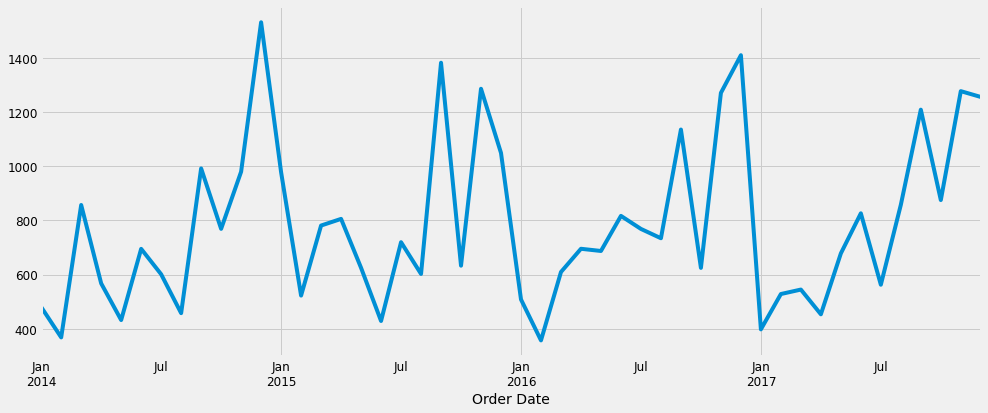

In [62]:
y.plot(figsize = (15,6))   # focus on code for the simple plot
plt.show()

<a id = Section3></a>
### **3. Time Series Analysis**

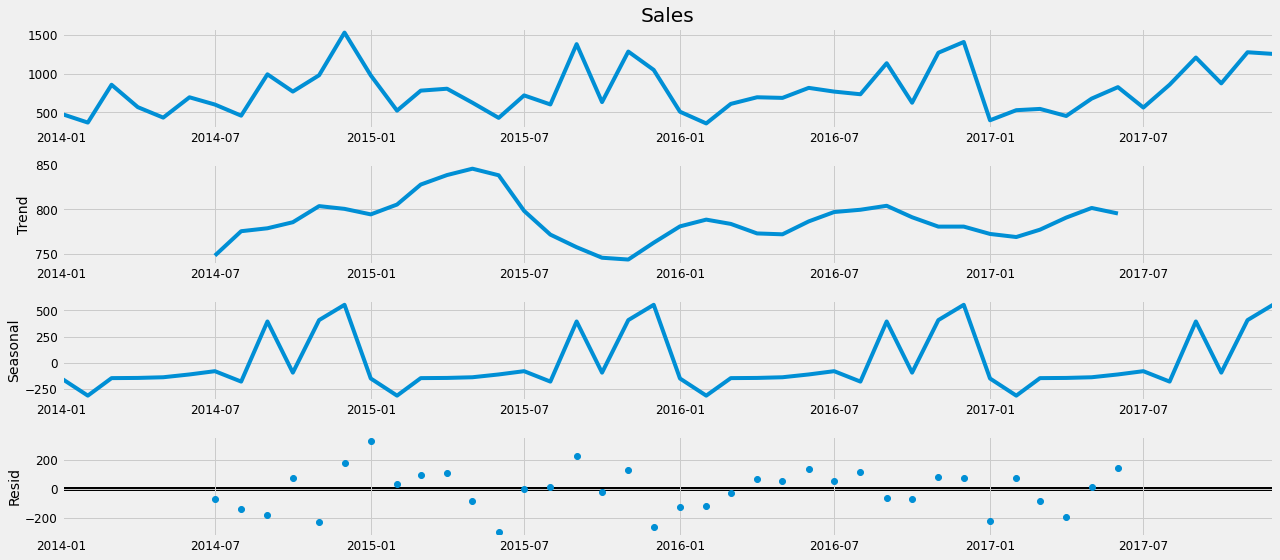

In [63]:
#understanding trend, seasonality and noise

from pylab import rcParams
rcParams['figure.figsize'] = 18,8


#applying stats model
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

<a id = Section4></a>
### **4. Using Itertools to generate p,d & q**

In [64]:
#Applying ARIMA --> Auto Regressive Integrated Moving Average
#ARIMA with p,d & q --> representing Seasonality, Trend and Noise in data

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [66]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try: 
            mod = sm.tsa.statespace.SARIMAX(y,order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1350.1648373792664
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920899
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028999297943
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1392.2749807697473
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803673205
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758116
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2711.3816397950823
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091556
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673031
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5549111386169
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2552.924640633667
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769277674
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576531079
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1348.4303179020787
ARI

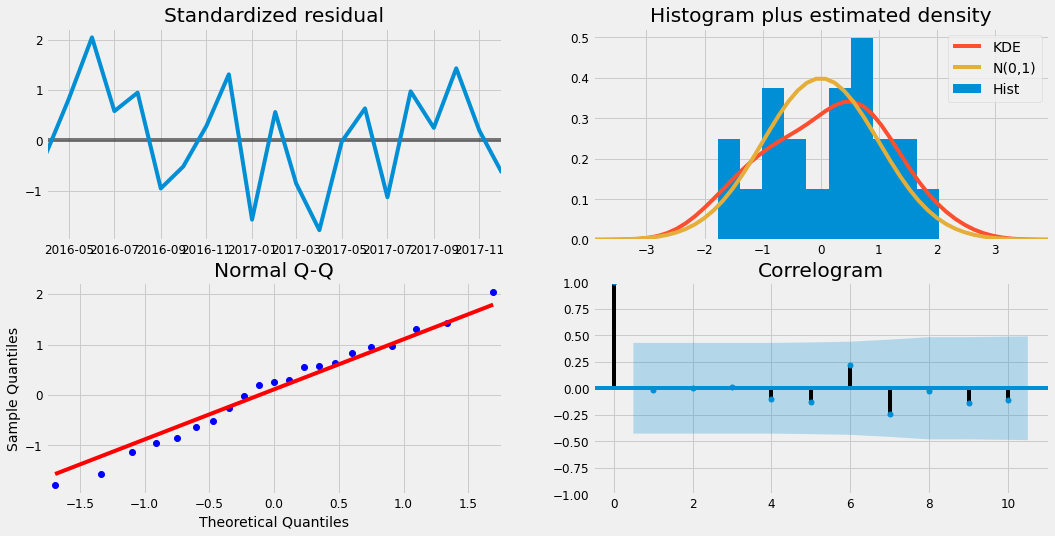

In [67]:
results.plot_diagnostics(figsize = (16,8)) #visual check on whether the model fits the data
plt.show()

<a id = Section5></a>
### **5. Predicting Results**

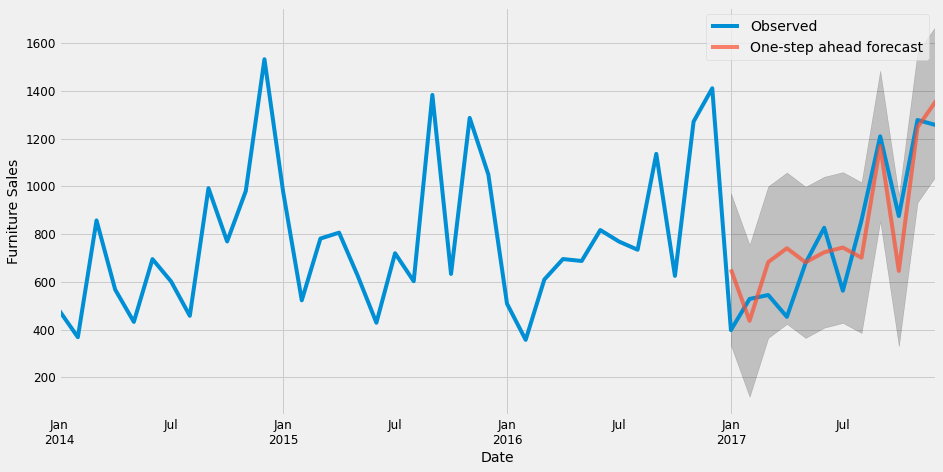

In [68]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)

pred_ci = pred.conf_int()

ax = y['2014':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead forecast', alpha= .7, figsize = (14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color = 'k', alpha= .2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()   #projecting the predictions on the data

In [70]:
y_forecasted = pred.predicted_mean
y_truth = y['2017':]

#applying error checks -currently mean suqared error

mse= ((y_forecasted - y_truth) **2).mean()
print('The mean squared error of our forecasts is {}'.format(round(mse , 2)))
print('The root mean squared error of our forecast is {}'.format(round(np.sqrt(mse), 2)))

The mean squared error of our forecasts is 25708.76
The root mean squared error of our forecast is 160.34


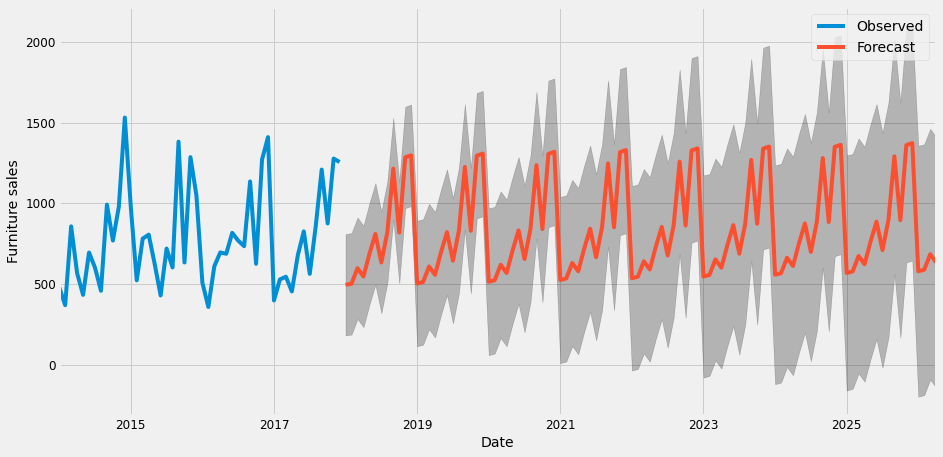

In [74]:
#producing and visualising the results

pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot( label = 'Observed', figsize = (14,7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color = 'k', alpha = .25)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture sales')

plt.legend()
plt.show()
